# Example 1: How to find the equilibrium distance for the $H_2$ molecule using Entanglement Forged VQE

In this tutorial, we apply Entanglement Forged VQE to compute the energy of a $H_2$ molecule at different bond lengths. By doing so, we can identify the equilibrium distance for the molecule. 

In [1]:
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
import numpy as np

from qiskit.circuit.library import TwoLocal
from qiskit_nature.drivers import UnitsType, Molecule
from qiskit_nature.drivers.second_quantization import PySCFDriver
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit import Aer

import sys
sys.path.append('../../')
from entanglement_forging import EntanglementForgedVQE
from entanglement_forging import EntanglementForgedGroundStateSolver
from entanglement_forging import EntanglementForgedConfig

## Molecule definition

In [2]:
distances = np.arange(0.3, 1.5, 0.1)

molecules = []

for dist in distances:
    molecule = Molecule(geometry=[['H', [0., 0., 0.]],
                                  ['H', [0., 0., dist]]],
                         charge=0, multiplicity=1)
    molecules = molecules + [molecule] 

## Program code

In [4]:
bitstrings = [[1,0],[0,1]]
ansatz = TwoLocal(2, [], 'cry', [[0,1],[1,0]], reps=1)

backend = Aer.get_backend('statevector_simulator')
converter = QubitConverter(JordanWignerMapper())

config = EntanglementForgedConfig(backend=backend, maxiter = 100)
calc = EntanglementForgedGroundStateSolver(converter, ansatz, bitstrings, config)

energies = []

for molecule, distance in zip(molecules, distances):
    driver = PySCFDriver.from_molecule(molecule, basis='sto3g')
    problem = ElectronicStructureProblem(driver)
    problem.second_q_ops()
    res = calc.solve(problem)
    energies_history = res.get_energies_history()
    energy = [None]
    if len(energies_history) > 0:
        energy = res.get_energies_history()[-1]
    energies = energies + energy
    print(f"Distance = {distance}, Energy = {energy[0]}")

Distance = 0.3, Energy = -0.6016841185694219
Distance = 0.4, Energy = -0.9138650790654701
Distance = 0.5, Energy = -1.0449617026054983
Distance = 0.6000000000000001, Energy = -1.1162402492976309
Distance = 0.7000000000000002, Energy = -1.1359262629168354
Distance = 0.8000000000000003, Energy = -1.1334807983370823
Distance = 0.9000000000000001, Energy = -1.1205268961158692
Distance = 1.0000000000000002, Energy = -1.1011481693720442
Distance = 1.1000000000000003, Energy = -1.0791896757504489
Distance = 1.2000000000000004, Energy = -1.0567280461567747
Distance = 1.3000000000000005, Energy = -1.0351862662602327
Distance = 1.4000000000000004, Energy = -1.0154202988571464


## Figure

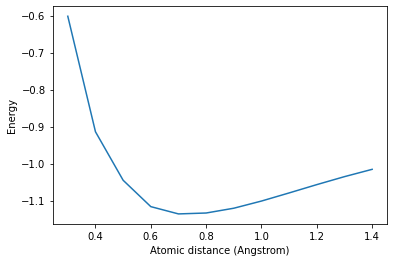

In [5]:
plt.plot(distances,energies)
plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy')
plt.show()

In [7]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright